<a id='head'></a>

# Восстановление золота из руды

## Оглавление
 
- [**Введение**](#intro)
    - [Входные данные](#input_data)
    - [Описание проекта](#purpose)
    - [Ход исследования](#progress)
    
- [**1. Обзор данных и импорт библиотек**](#part_1)
    - [1.1 Импорт библиотек и датасета](#part_1_1)
    - [1.2 Обзор данных](#part_1_2)
    - [1.3 Проверка правильности расчета эффективности обогащения](#part_1_3)
    - [1.4 Анализ признаков недоступный в тестовой выборке](#part_1_4)

- [**2. Подготовка данных**](#part_2)
    - [2.1 Предобработка](#part_2_1)

- [**3. Анализ данных**](#part_3)
    - [3.1 Концентрация металлов на различных этапах очистки](#part_3_1)
    - [3.2 Распределения размеров гранул сырья на обучающей и тестовой выборках](#part_3_2)
    - [3.3 Исследование суммарной концентрации всех веществ на разных стадиях](#part_3_3)

- [**4. Модель**](#part_4)
    - [4.1 Функця для вычисления итоговой sMAPE](#part_4_1)
    - [4.2 Масштабирование признаков и разбивка на выборки](#part_4_2)
    - [4.3 Выбор модели - Линейная регрессия](#part_4_3)
    - [4.4 Выбор модели - Дерево решений](#part_4_4)
    - [4.5 Выбор модели - Случайный лес](#part_4_5)
    - [4.6 Проверка sMAPE на тестовой выборке](#part_4_6)
    - [Выводы](#part_4_conclusions)

- [Чек лист](#check_list)

<a id='intro'></a>
## Введение

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам **`pandas`**, **`matplotlib`** и **`sklearn`** Вам поможет их документация.

<a id='input_data'></a>
### Входные данные [▴](#head)

**Технологический процесс**
- **`Rougher feed`** — исходное сырье
- **`Rougher additions`** (или **`reagent additions`**) — флотационные реагенты: `Xanthate`, `Sulphate`, `Depressant`
    - **`Xanthate`** — ксантогенат (промотер, или активатор флотации);
    - **`Sulfate`** — сульфат (на данном производстве сульфид натрия);
    - **`Depressant`** — депрессант (силикат натрия).
- **`Rougher process`** (англ. «грубый процесс») — флотация
- **`Rougher tails`** — отвальные хвосты
- **`Float banks`** — флотационная установка
- **`Cleaner process`** — очистка
- **`Rougher Au`** — черновой концентрат золота
- **`Final Au`** — финальный концентрат золота

**Параметры этапов**
- **`air amount`** — объём воздуха
- **`fluid levels`** — уровень жидкости
- **`feed size`** — размер гранул сырья
- **`feed rate`** — скорость подачи

**Наименование признаков**
- `этап.тип_параметра.название_параметра`
- `rougher.input.feed_ag` - Пример

**Возможные значения для блока `этап`:**
- **`rougher`** — флотация
- **`primary_cleaner`** — первичная очистка
- **`secondary_cleaner`** — вторичная очистка
- **`final`** — финальные характеристики

**Возможные значения для блока `тип_параметра`:**
- **`input`** — параметры сырья
- **`output`** — параметры продукта
- **`state`** — параметры, характеризующие текущее состояние этапа
- **`calculation`** — расчётные характеристики


<a id='purpose'></a>
### Описание проекта [▴](#head)

Данные находятся в трёх файлах:
- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в `тестовой` выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в `тестовом` наборе нет целевых признаков.

`Исходный датасет` содержит `обучающую` и `тестовую` выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

<a id='progress'></a>
### Ход исследования [▴](#head)

1. **Подготовьте данные**
    - Откройте файлы и изучите их.
    - Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака `rougher.output.recovery`. Найдите `MAE` между вашими расчётами и значением признака. Опишите выводы.
    - Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
    - Проведите предобработку данных.


2. **Проанализируйте данные**
    - Посмотрите, как меняется концентрация металлов (`Au`, `Ag`, `Pb`) на различных этапах очистки. Опишите выводы.
    - Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
    - Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


3. **Постройте модель**
    - Напишите функцию для вычисления итоговой `sMAPE`.
    - Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.


<a id='part_1'></a>
## 1. Обзор данных и импорт библиотек

<a id='part_1_1'></a>
### 1.1 Импорт библиотек и датасета [▴](#head)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

**Установка параметров:**

In [2]:
plt.rcParams.update({'font.size':15}) # зададим размер шрифта по умолчанию для графиков

**Импорт данных**

Так как столбец `data` содержит уникальные значения измерений, а так же является идентичным на все 3 датасета, будем использовать его как `индекс`, это упростит нам сопоставление таблиц.

In [3]:
# для того чтобы код работал локально и на Практикуме применим конструкцию try-except

try: # для Практикума
    gr_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
    gr_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    gr_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
    
except: # локально
    gr_full = pd.read_csv('datasets/gold_recovery_full_new.csv', index_col='date')
    gr_train = pd.read_csv('datasets/gold_recovery_train_new.csv', index_col='date')
    gr_test = pd.read_csv('datasets/gold_recovery_test_new.csv', index_col='date')

In [4]:
gr_full.name = 'gold_recovery_full'
gr_train.name = 'gold_recovery_train'
gr_test.name = 'gold_recovery_test'

<a id='part_1_2'></a>
### 1.2 Обзор данных [▴](#head)

Для обзора данных используем заранее заготовленную функцию:

In [5]:
def overview(o_df):
    print(o_df.name)
    
    print('\nОбщий вид')
    display(o_df.head())
    
    print('\n.info()\n')
    print(o_df.info())
    
    print(f'\nКоличество полных дубликатов: {o_df.duplicated().sum()} шт.')
    print(f'Общее количество пропусков во всем датафрейме: {o_df.isna().sum().sum()} шт.') 
    print(f'Доля пропусков: {o_df.isna().sum().sum() / (o_df.shape[0] * o_df.shape[1]):.2%}\n\n')

In [6]:
overview(gr_full)
overview(gr_train)
overview(gr_test)

gold_recovery_full

Общий вид


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                   

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                   

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    529

**Выводы**

На первый взгляд исходные данные в порядке
- Полные дубликаты отсутствуют
- Тип данных соответствует указанным значениям
- Есть небольшое количество пропусков, с которыми мы разберемся чуть позднее на этапе предобработки.

<a id='part_1_3'></a>
### 1.3 Проверка правильности расчета эффективности обогащения [▴](#head)

Эффективность обогащения рассчитывается по формуле:

$$Recovery = {C \cdot (F - T) \over F \cdot (C - T)} \cdot 100\% $$

где:
- **`C`** — доля золота в концентрате после флотации/очистки;
- **`F`** — доля золота в сырье/концентрате до флотации/очистки;
- **`T`** — доля золота в отвальных хвостах после флотации/очистки.

Для начала создадим необходимые константы и формулу:

In [7]:
F = gr_train['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
C = gr_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
T = gr_train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

recovery = (C * (F - T)) / (F * (C - T)) * 100

Теперь напишем функцию расчета **`MAE`** (`Mean Absolute Error` или `Среднее Абсолютное Отклонение`)

$$MAE = {1 \over N} \cdot \sum_{i=1}^{N} \mid y_{i} - \widehat{y_{i}} \mid$$

In [8]:
def mae(target, predictions):
    error = 0
    for i in range(target.shape[0]):
        error += abs(target[i] - predictions[i])
    return error / target.shape[0] 

print('MAE =', mae(gr_train['rougher.output.recovery'], recovery))

MAE = 9.73512347450521e-15


**Выводы**

Средняя абсолютная ошибюка по нашей формуле стремится к нулю $9.7 \cdot 10^{-15}$ это означает, что предоставленные данные о эффективночти обогащения корректны. Можем продолжать исследование.

<a id='part_1_4'></a>
### 1.4 Анализ признаков недоступный в тестовой выборке [▴](#head)

Разберем признаки недоступные в тестовой выборке.

Для этого создадим два множества на основе заголовков и с помощью функции `.difference` найдем разницу.

In [9]:
gr_full_columns = set(gr_full.columns)
gr_test_columns = set(gr_test.columns)

difference_columns = gr_full_columns.difference(gr_test_columns)

display(difference_columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**Выводы**

Как видно из получившегося множества, все эти признаки относятся к промежуточным результатам очистки, а следовательно замеряются уже непосредственно в процессе очистки. Это нам не подходит, так как модель должна предсказывать результаты еще до начала очистки.

Следовательно в тренировочной выборке они тоже должны отсутствовать, так как после запуска нашей модели в работу, этих данных  на входе у нее не будет.

<a id='part_2'></a>
## 2. Подготовка данных

<a id='part_2_1'></a>
### 2.1 Предобработка [▴](#head)

Разберемся с пропущенными значениями.

Для начала посмотрим на общее количество:

In [10]:
print('Количество пропущенных значений в датафреймах gd_full, gf_train, gf_test:')
for i in [gr_full, gr_train, gr_test]:
    print(f'NaN значений: {i.isna().sum().sum()} шт. - {i.isna().sum().sum() / (i.shape[0] * i.shape[1]):.2%}')

Количество пропущенных значений в датафреймах gd_full, gf_train, gf_test:
NaN значений: 4481 шт. - 0.27%
NaN значений: 4100 шт. - 0.34%
NaN значений: 90 шт. - 0.03%


Пропущенных значений совсем немного. 

Из условий задачи мы знаем, что соседние по времени замеры зачастую схожи. Следовательно можно использовать метод заполнения **`ffill`**, который заполнит пропуски ближайшими по времени соседями.

In [11]:
gr_full = gr_full.fillna(method='ffill')
gr_train = gr_train.fillna(method='ffill')
gr_test = gr_test.fillna(method='ffill')

In [12]:
print('Количество пропущенных значений в датафреймах gd_full, gf_train, gf_test:')
for i in [gr_full, gr_train, gr_test]:
    print(f'NaN значений: {i.isna().sum().sum()} шт. - {i.isna().sum().sum() / (i.shape[0] * i.shape[1]):.2%}')

Количество пропущенных значений в датафреймах gd_full, gf_train, gf_test:
NaN значений: 0 шт. - 0.00%
NaN значений: 0 шт. - 0.00%
NaN значений: 0 шт. - 0.00%


Пропусков больше нет, можно приступать к анализу данных.

<a id='part_3'></a>
## 3. Анализ данных

<a id='part_3_1'></a>
### 3.1 Концентрация металлов на различных этапах очистки [▴](#head)

Для начала сформируем функцию для построения графиков.

In [13]:
def concentrate_hist(metal): # функция принимает на вход текстовое обозначение металла

    plt.figure(figsize=(20,7))
    
    # формируем список этапов очистки по которым будем строить гистограммы
    # переменная в {} это указанный нами металл в виде параметра функции
    hist_list = [
        f'rougher.input.feed_{metal}',
        f'rougher.output.concentrate_{metal}',
        f'primary_cleaner.output.concentrate_{metal}',
        f'final.output.concentrate_{metal}'
    ]
    
    # Список этапов очистки, используется для наглядности.
    process = [
        'Черновой материал', 
        'Флотация', 
        'Первичная очистка',
        'Вторичная очистка'
    ]
    
    # Обходим циклом список этапов и для каждого строим гистограмму на одном figure
    for i in range(len(hist_list)):
        gr_full[hist_list[i]].hist(bins=100, alpha=0.6, label=f'Этап {i+1}: {process[i]}')
    
    plt.legend()
    plt.title(f'Этапы очистки металла: {metal}')
    plt.xlabel(f'Концентрация {metal}')
    plt.ylabel('Количество значений')
    plt.show()

**Золото**

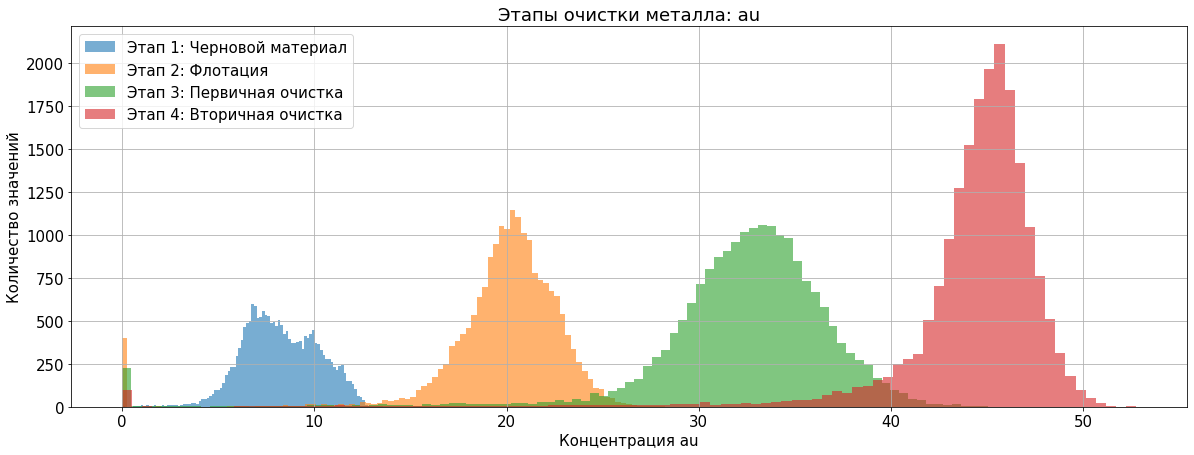

In [14]:
concentrate_hist('au')

При очистке `золота` мы видим планомерный рост концентрации `золота` от этапа к этапу. Так же после вторичной очистки снижается дисперсия, как следствие наши значения имеют меньший разброс вокруг среднего.

**Серебро**

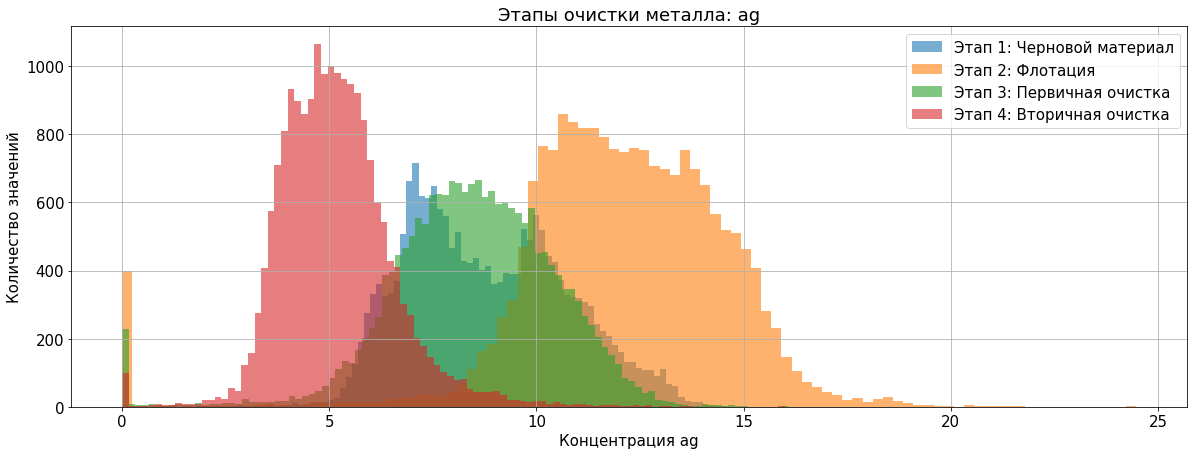

In [15]:
concentrate_hist('ag')

Концентрация `серебра` на первом этапе очистки растет, а потом начинает падать. По итогу концентрация `серебра` на выходе ниже чем в черновом материале.

**Свинец**

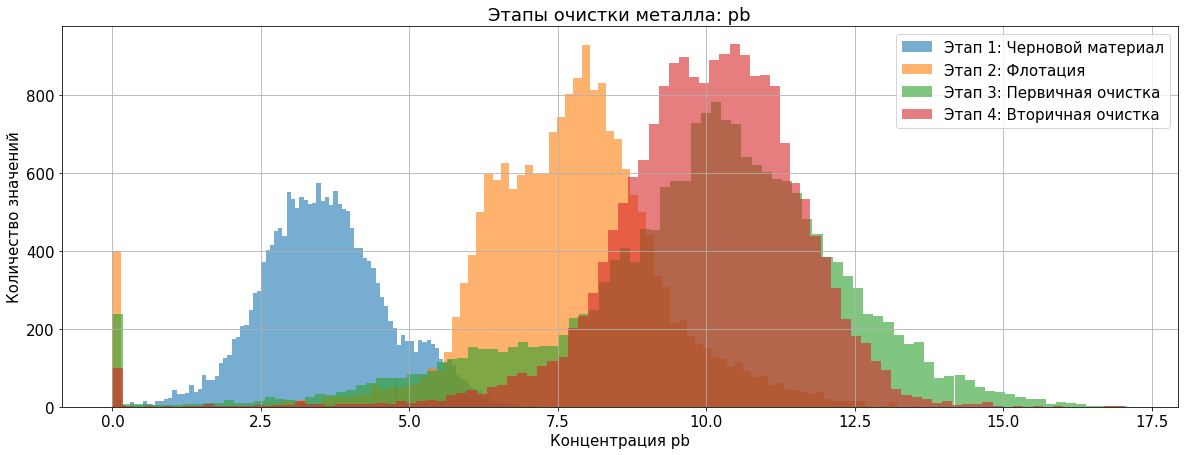

In [16]:
concentrate_hist('pb')

Концентраяция `свинца` растет с течением этапов очистки. Концентрация после первичной и вторичной очистки примерно равна, однако на втором этапе очистки уменьшается дисперсия значений и мы получаем более стабильное среднее.

**Sol**

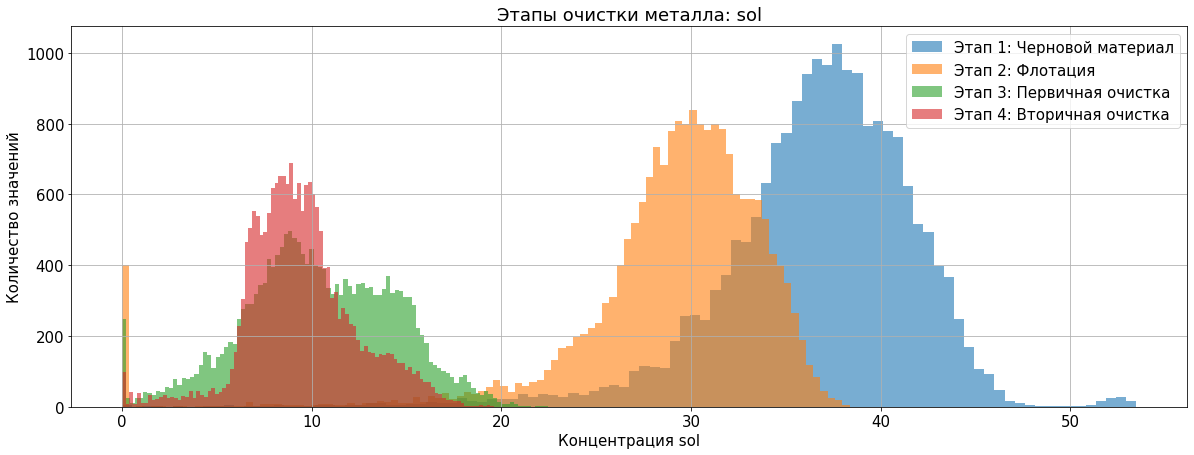

In [17]:
concentrate_hist('sol')

Концентрация `sol` падает от этапа к этапу очистки.

На всех гистограммах у нас присутсвуют странные околонулевые всплески, взглянем на них поближе.

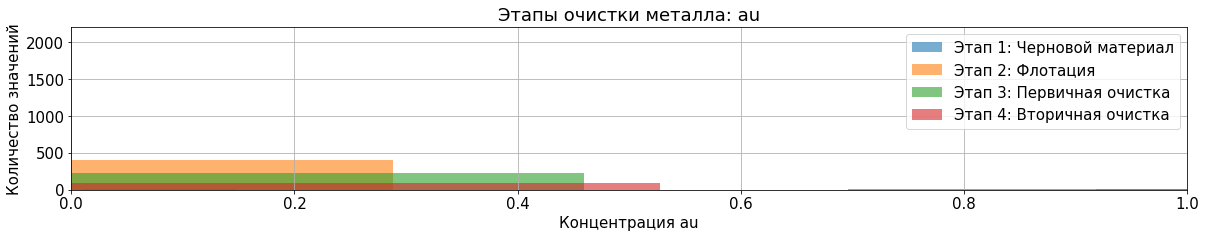

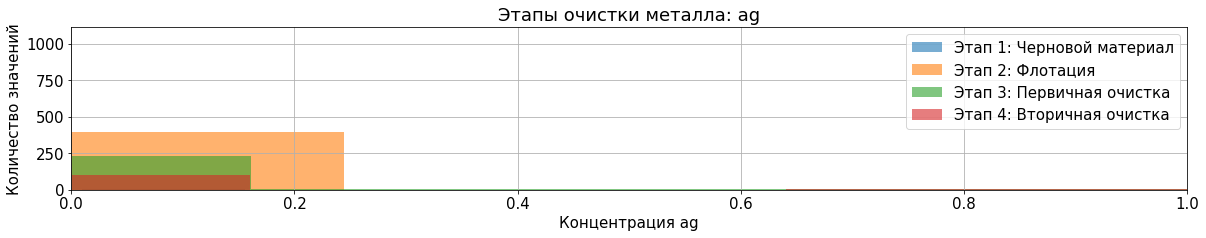

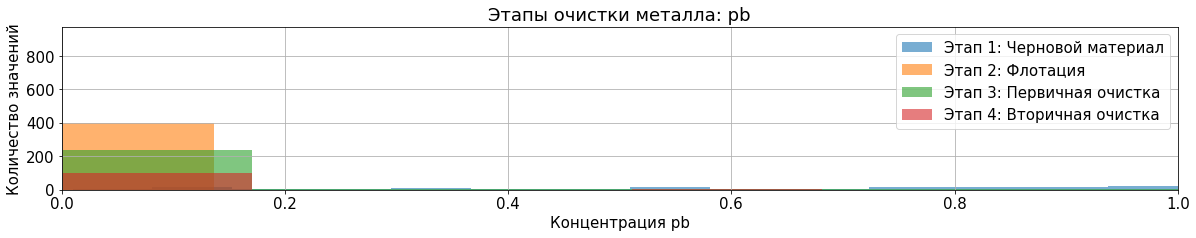

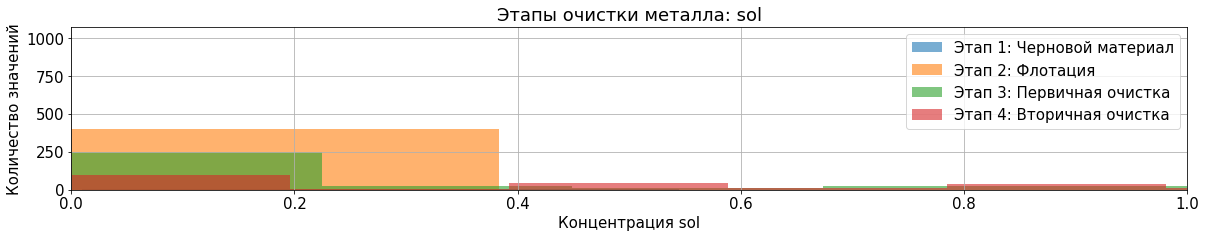

In [18]:
for metal in ['au', 'ag' ,'pb', 'sol']:

    plt.figure(figsize=(20,3))
    
    hist_list = [
        f'rougher.input.feed_{metal}',
        f'rougher.output.concentrate_{metal}',
        f'primary_cleaner.output.concentrate_{metal}',
        f'final.output.concentrate_{metal}'
    ]
    
    process = [
        'Черновой материал', 
        'Флотация', 
        'Первичная очистка',
        'Вторичная очистка'
    ]
    
    for i in range(len(hist_list)):
        gr_full[hist_list[i]].hist(bins=100, alpha=0.6, label=f'Этап {i+1}: {process[i]}')
    
    plt.legend()
    plt.title(f'Этапы очистки металла: {metal}')
    plt.xlabel(f'Концентрация {metal}')
    plt.ylabel('Количество значений')
    plt.xlim(0,1)
    
    plt.show()

Наблюдаем следующую картину:

На входе практически отсутвует околонулевая концентрация в `черновом материале`. С учетом того, что на каждом этапе концентрация как правило растет, то околонулевые значения это скорее всего какие то ошибки. 

Судя по всему мы можем удалить значения не превышающие `0.6`

**Удаление околонулевых значений**

In [19]:
# для начала сделаем список столбцов
# по которым мы букдем собирать индексы строк где есть околонулевые значения

drop_zeros_list = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'final.output.concentrate_au']

# создадим множество в которое будем добавлять значения индексов

drop_set = set()

# так как множество не может содержать повторяющихся значений 
# мы просто будем докидывать в него все найденные значения, лишнее отсечется само

for i in drop_zeros_list:
    drop_set = drop_set | set(gr_full[gr_full[i] < 0.6].index) # найти индексы строк с околонулевым значением 
                                                               # и объединить с существующим множеством

print(f'Доля строк с околонулевыми значениями = {len(drop_set) / gr_full.shape[0]:.3%}')

Доля строк с околонулевыми значениями = 4.522%


Количество не превышает `5%`. Можем удалить их.

In [20]:
gr_full = gr_full.drop(drop_set, axis=0, errors='ignore')
gr_train = gr_train.drop(drop_set, axis=0, errors='ignore')
gr_test = gr_test.drop(drop_set, axis=0, errors='ignore')

<a id='part_3_2'></a>
### 3.2 Распределения размеров гранул сырья на обучающей и тестовой выборках [▴](#head)

Для исследования разброса гранул сырья построим диаграмму размаха.

In [21]:
def feed_size_compare(process): # на вход принимаем название процесса в формате str

    plt.figure(figsize=(20,4))
    
    # строим диаграмму размаха для тренировочной и тестовой выборки
    plt.boxplot([gr_train[process], gr_test[process]], vert=False, labels=['Train', 'Test'])
    
    plt.title(f'Распределение размера гранул в процессе: {process[:process.rfind(".")]}')
    plt.xlabel('Размер гранул')
    plt.ylabel('Выборка')
    plt.grid()
    plt.show()

**Размер гранул в черновом материале** 

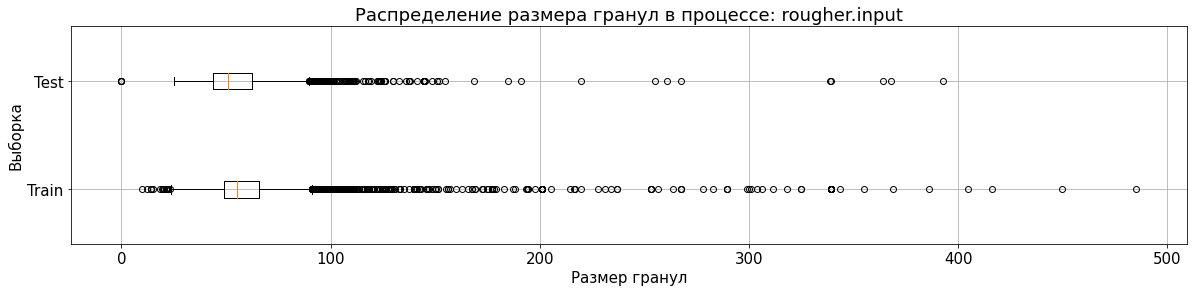

In [22]:
feed_size_compare('rougher.input.feed_size')

**Размер гранул в первичной очистке** 

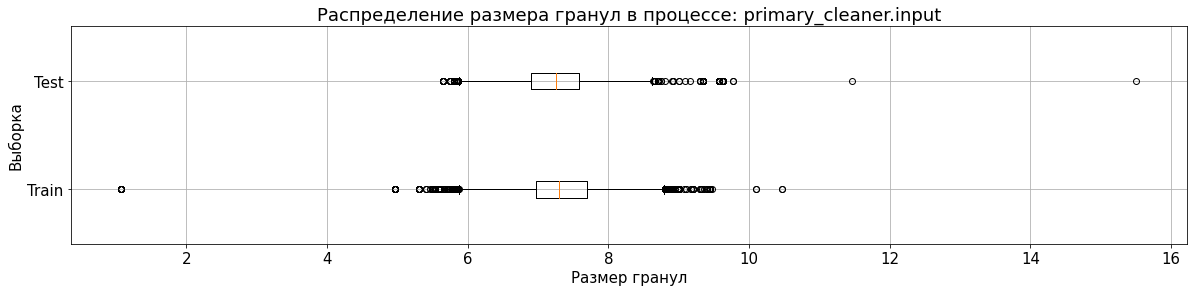

In [23]:
feed_size_compare('primary_cleaner.input.feed_size')

По диаграмме размаха можем сделать вывод что распределение размера гранул в `тренировочной` и `тестовой` выборке примерно одинаковое. Можем не беспокоится за оценку модели этого этапа.

<a id='part_3_3'></a>
### 3.3 Исследование суммарной концентрации всех веществ на разных стадиях [▴](#head)

Для исследования концентрации всех веществ найдем их сумму на каждом этапе очистки.

Для этого сначала сделаем 4 списка, отвечающие за объединение металлов на каждом этапе.

In [24]:
rougher_input_all = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.input.feed_au']

rougher_output_all = [
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au']

primary_cleaner_output_all = [   
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.concentrate_au']
    
final_output_all = [    
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'final.output.concentrate_au']

Построим гистограммы на основе сумм этих металлов.

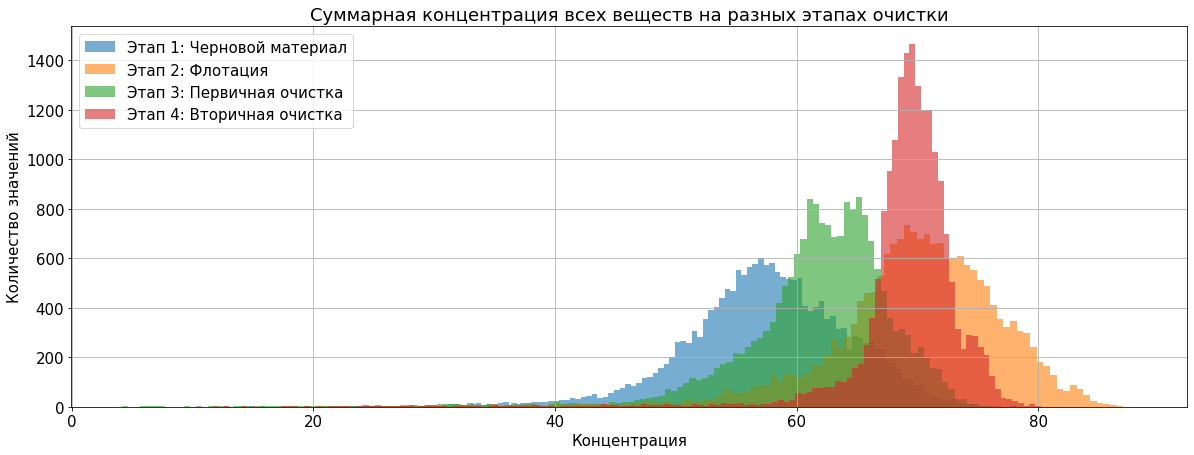

In [25]:
plt.figure(figsize=(20,7))

hist_list_all = [
    rougher_input_all,
    rougher_output_all,
    primary_cleaner_output_all,
    final_output_all
]

process = [
    'Черновой материал', 
    'Флотация', 
    'Первичная очистка',
    'Вторичная очистка'
]

for i in range(len(hist_list_all)):
    gr_full[hist_list_all[i]].sum(axis=1).hist(bins=150, alpha=0.6, label=f'Этап {i+1}: {process[i]}')

plt.legend()
plt.title('Суммарная концентрация всех веществ на разных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('Количество значений')
plt.show()

Концентрация полезных веществ увеличивается с ходом очистки. На финальном этапе уменьшается дисперсия значений, что ведет к более стабильному среднему значению получаемых на выходе полезных материалов.

<a id='part_4'></a>
## 4. Модель

<a id='part_4_1'></a>
### 4.1 Функця для вычисления итоговой sMAPE [▴](#head)

**`sMAPE`** (`Symmetric Mean Absolute Percentage Error` или `Симметричное Среднее Абсолютное Процентное Отклонение`). 

Найдем по следующей формуле:
$$sMAPE = {1 \over N} \cdot \sum_{i=1}^{N}{\mid y_{i} - \widehat{y_{i}} \mid \over \left( \mid y_{i} \mid + \mid \widehat{y_{i}} \mid \right) \div 2} \cdot 100 \%$$


In [26]:
def smape(target, predictions):
    error = 0
    for i in range(target.shape[0]):
        error += abs(target[i] - predictions[i]) / ((abs(target[i]) + abs(predictions[i])) / 2) * 100
    return error / target.shape[0]

Итоговое **`sMAPE`** найдем по следующей формуле:

$$sMAPE_{conclusion} = \left( 25\% \cdot sMAPE_{roughet} \right) + \left( 75\% \cdot sMAPE_{final} \right)$$

In [27]:
def conclusion_smape(targ_roug, pred_roug, targ_fin, pred_fin):
    smape_rougher = smape(targ_roug, pred_roug)
    smape_final = smape(targ_fin, pred_fin)
    print(f'smape_rougher = {smape_rougher:.3f}')
    print(f'smape_final = {smape_final:.3f}')
    return (0.25 * smape_rougher) + (0.75 * smape_final)

**Создадим оценщик на основе нашей функции:**

In [28]:
smape_scorer = make_scorer(smape, greater_is_better=False) 

<a id='part_4_2'></a>
### 4.2 Разбивка на выборки [▴](#head)

**Разбивка на выборки**

Для создания тренировочной выборки удалим из нее признаки, которые получаются уже в процессе очистки. Для этого у нас есть множество `difference_columns` осталось только дропнуть все столбцы, которые оно содержит.

In [29]:
features_train = gr_train.drop(difference_columns, axis=1)
target_train_rougher_output = gr_train['rougher.output.recovery'] # целевой черновой
target_train_final_output = gr_train['final.output.recovery'] # целевой финальный

Так как в `тестовой` выборке отсутствуют целевые значения, а они нам нужны для оценки построенной модели, подтянем их из `полного` датасета по индексам.

In [30]:
features_test = gr_test.copy()
target_test_rougher_output = gr_full['rougher.output.recovery'][gr_test.index] # целевой черновой
target_test_final_output = gr_full['final.output.recovery'][gr_test.index] # целевой финальный

<a id='part_4_3'></a>
### 4.3 Выбор модели - Линейная регрессия [▴](#head)

Проверим Линейную регрессию методом кросс-валидации

In [31]:
model_linear_regression = LinearRegression(normalize=True)

scores_rougher = cross_val_score(model_linear_regression, 
                                 features_train, 
                                 target_train_rougher_output, 
                                 scoring=smape_scorer, cv=5, n_jobs=-1)

scores_final = cross_val_score(model_linear_regression, 
                               features_train, 
                               target_train_final_output, 
                               scoring=smape_scorer, cv=5, n_jobs=-1)

mean_score_rougher = np.mean(scores_rougher)
mean_score_final = np.mean(scores_final)

print(f'mean_score_rougher: {mean_score_rougher:.3f}')
print(f'mean_score_final: {mean_score_final:.3f}')

mean_score_rougher: -7.257
mean_score_final: -10.760


<a id='part_4_4'></a>
### 4.4 Выбор модели - Дерево решений [▴](#head)

Для начала установим параметры поиска `Дерева решений` для `GreedSearchCV`:

In [32]:
params_decision_tree = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}

**ROUGHER _ GreedSearch**

In [33]:
# grid_search_tree_rougher = GridSearchCV(
#     estimator=DecisionTreeRegressor(random_state=12345),
#     param_grid=params_decision_tree,
#     cv=5,
#     scoring=smape_scorer,
#     n_jobs=-1
# )

# grid_search_tree_rougher.fit(features_train, target_train_rougher_output)

# print(f'Лучший score модели: {grid_search_tree_rougher.best_score_:.3f}')
# print(f'Параметры лучшей модели: {grid_search_tree_rougher.best_params_}')

    Лучший score модели: -6.891
    Параметры лучшей модели: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

Теперь подставим полученные параметры и оценим результат средним значением по кросс-валидации.

**ROUGHER _ Оценка кросс-валидацией**

In [34]:
model_decision_tree_rougher = DecisionTreeRegressor(max_depth=5,
                                            min_samples_leaf=3,
                                            min_samples_split=2,
                                            random_state=12345)

scores_rougher = cross_val_score(model_decision_tree_rougher, 
                                 features_train, 
                                 target_train_rougher_output, 
                                 scoring=smape_scorer, cv=5, n_jobs=-1)

mean_score_rougher = np.mean(scores_rougher)

print(f'mean_score_rougher: {mean_score_rougher:.3f}')

mean_score_rougher: -6.891


**FINAL _ GreedSearch**

In [35]:
# grid_search_tree_final = GridSearchCV(
#     estimator=DecisionTreeRegressor(random_state=12345),
#     param_grid=params_decision_tree,
#     cv=5,
#     scoring=smape_scorer,
#     n_jobs=-1
# )

# grid_search_tree_final.fit(features_train, target_train_final_output)

# print(f'Лучший score модели: {grid_search_tree_final.best_score_:.3f}')
# print(f'Параметры лучшей модели: {grid_search_tree_final.best_params_}')

    Лучший score модели: -9.151
    Параметры лучшей модели: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Теперь подставим полученные параметры и оценим результат средним значением по кросс-валидации.

**FINAL _ Оценка кросс-валидацией**

In [36]:
model_decision_tree_final = DecisionTreeRegressor(max_depth=2,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            random_state=12345)

scores_final = cross_val_score(model_decision_tree_final, 
                               features_train, 
                               target_train_final_output, 
                               scoring=smape_scorer, cv=5, n_jobs=-1)

mean_score_final = np.mean(scores_final)

print(f'mean_score_final: {mean_score_final:.3f}')

mean_score_final: -9.151


<a id='part_4_5'></a>
### 4.5 Выбор модели - Случайный лес [▴](#head)

Для начала установим параметры поиска `Случайного леса` для `GreedSearchCV`:

In [37]:
params_random_forest = {
    'n_estimators': [50, 75, 100],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    'max_depth': [4, 5, 6]
}

**ROUGHER _ GreedSearch**

In [38]:
# grid_search_forest_rougher = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=12345),
#     param_grid=params_random_forest,
#     cv=5,
#     scoring=smape_scorer,
#     n_jobs=-1
# )

# grid_search_forest_rougher.fit(features_train, target_train_rougher_output)

# print(f'Лучший score модели: {grid_search_forest_rougher.best_score_:.3f}')
# print(f'Параметры лучшей модели: {grid_search_forest_rougher.best_params_}')

    Лучший score модели: -6.409
    Параметры лучшей модели: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 75}

**ROUGHER _ Оценка кросс-валидацией**

In [39]:
model_random_forest_rougher = RandomForestRegressor(n_estimators=75, 
                                            max_depth=5, 
                                            min_samples_leaf=5,
                                            min_samples_split=2,
                                            random_state=12345)

scores_rougher = cross_val_score(model_random_forest_rougher, 
                                 features_train, 
                                 target_train_rougher_output, 
                                 scoring=smape_scorer, cv=5, n_jobs=-1)

mean_score_rougher = np.mean(scores_rougher)

print(f'mean_score_rougher: {mean_score_rougher:.3f}')

mean_score_rougher: -6.409


**FINAL _ GreedSearch**

In [40]:
# grid_search_forest_final = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=12345),
#     param_grid=params_random_forest,
#     cv=5,
#     scoring=smape_scorer,
#     n_jobs=-1
# )

# grid_search_forest_final.fit(features_train, target_train_final_output)

# print(f'Лучший score модели: {grid_search_forest_final.best_score_:.3f}')
# print(f'Параметры лучшей модели: {grid_search_forest_final.best_params_}')

    Лучший score модели: -8.734
    Параметры лучшей модели: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}

**FINAL _ Оценка кросс-валидацией**

In [41]:
model_random_forest_final = RandomForestRegressor(n_estimators=50,
                                            max_depth=5,
                                            min_samples_leaf=5,
                                            min_samples_split=2,
                                            random_state=12345)

scores_final = cross_val_score(model_random_forest_final, 
                               features_train, 
                               target_train_final_output, 
                               scoring=smape_scorer, cv=5, n_jobs=-1)

mean_score_final = np.mean(scores_final)

print(f'mean_score_final: {mean_score_final:.3f}')

mean_score_final: -8.734


**Выводы**

После проведенной оценки моделей, получили следующие значения `Симметричного среднего абсолютного отклонения` (**`sMAPE`**) в процентах:

Модель | rougher % | final %
-|-|-
**Линейная регрессия** | 7.257 | 10.760
**Дерево решений** | 6.891 | 9.151
**Случайный лес** | 6.409 | 8.734

Минимальное отклонение дала модель `Случайного леса`, выберем ее для финального тестирования.

<a id='part_4_6'></a>
### 4.6 Проверка sMAPE на тестовой выборке [▴](#head)

**Случайный лес**

In [42]:
model_random_forest_rougher.fit(features_train, target_train_rougher_output)
predicted_test_rougher = model_random_forest_rougher.predict(features_test)

model_random_forest_final.fit(features_train, target_train_final_output)
predicted_test_final = model_random_forest_final.predict(features_test)

conclusion = conclusion_smape(
    target_test_rougher_output,
    predicted_test_rougher,
    
    target_test_final_output,
    predicted_test_final
)

print(f'Итоговый sMAPE = {conclusion:.3f}')

smape_rougher = 4.423
smape_final = 8.157
Итоговый sMAPE = 7.223


Итоговый **`sMAPE`** составил **`7.223%`**, проверим результат на адекватность с помощью модели **`Dummy Regressor`**

In [43]:
model_dummy_rougher = DummyRegressor()
model_dummy_final = DummyRegressor()

model_dummy_rougher.fit(features_train, target_train_rougher_output)
predicted_test_rougher = model_dummy_rougher.predict(features_test)

model_dummy_final.fit(features_train, target_train_final_output)
predicted_test_final = model_dummy_final.predict(features_test)

conclusion = conclusion_smape(
    target_test_rougher_output,
    predicted_test_rougher,
    
    target_test_final_output,
    predicted_test_final
)

print(f'Итоговый sMAPE = {conclusion:.3f}')

smape_rougher = 5.254
smape_final = 8.446
Итоговый sMAPE = 7.648


Как видим **`Dummy Regressor`** дал результат хуже чем у нашей модели. На основе чего можем сказать, что наша модель ведет себя адекватно.

<a id='part_4_conclusions'></a>
### Выводы [▴](#head)

Мы провели исследование процесса восстановления золота из руды. Входные данные оказались достаточно чистыми, чтобы практически сразу приступить у исследованию.

В процессе исследования мы убедились, что параметры обогащения рассчитаны правильно

Что касается очистки, на финальном этапе как правило уменьшается дисперсия концентрации материалов, то есть разброс значений становится меньше, как следствие итоговый результат стабильней чем предыдущие этапы, а так же:
- концентрация `золота` растет стабильно на каждом этапе.
- концентрация `серебра` наоборот, к финалу очистки оказывается даже ниже чем в черновом сырье
- концентрация `свинца` на финале очистки оказывается выше чем в черновом материале

Дополнительно мы проверили, что разброс значений размеров гранул сырья на `тестовой` и `тренировочной` выборке примерно одинаковый, что позволило нам избежать ошибок в обучении модели.

По итогу выбора моделей, самая точная оказалсь модель `Случайного леса`, именно ее мы использовали для финального тестирования.

Итоговый параметр `sMAPE`, которого нам удолось добиться = `7.223%`, что лучше чем у случайной `Dummy` модели, что позволяет нам использовать нашу обученную модель в производстве.